In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import pickle
from joblib import dump, load

In [2]:
df = pd.read_csv('BNB2019-2024.csv')
df1 = df.reset_index()['Close']

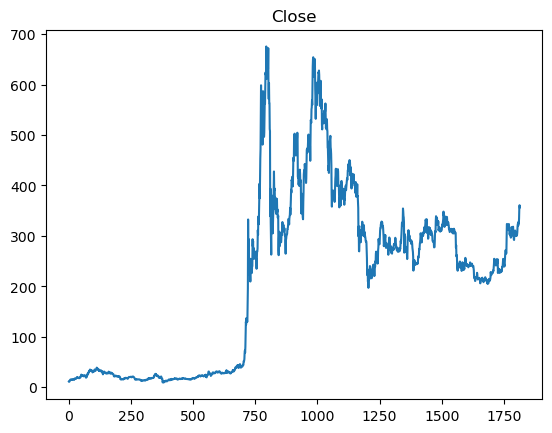

In [3]:
plt.plot(df1)
plt.title("Close")
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [5]:
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))


train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [6]:
# 5. Tạo dataset cho mô hình
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
X_train.shape

(1351, 100)

### RandomForest

In [8]:
model=RandomForestRegressor()

In [9]:
# best_parameters

In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
# Lưu mô hình vào file
with open('Model/rf.pkl', 'wb') as file:
    pickle.dump(model, file)

In [12]:
# Tải mô hình từ file
with open('Model/rf.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [13]:
train_predict = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)


In [14]:
y_pred

array([0.45513876, 0.45166782, 0.44865419, 0.44874485, 0.4508864 ,
       0.4489193 , 0.40175668, 0.41407141, 0.37073558, 0.38144343,
       0.37821641, 0.34855635, 0.34937859, 0.34205101, 0.35125715,
       0.35072844, 0.35148567, 0.35231174, 0.35675422, 0.35483432,
       0.35311694, 0.35514897, 0.35977026, 0.35464724, 0.35292877,
       0.35226726, 0.35635778, 0.35521238, 0.35636855, 0.34532715,
       0.34492317, 0.35700037, 0.35713124, 0.35491197, 0.35612966,
       0.35583284, 0.3535912 , 0.34568339, 0.35132982, 0.35595465,
       0.34671158, 0.35942771, 0.36234788, 0.363397  , 0.37897964,
       0.36400294, 0.36538959, 0.3619503 , 0.359434  , 0.36305517,
       0.36183262, 0.36041905, 0.36137376, 0.36208755, 0.363377  ,
       0.36235591, 0.36499966, 0.36337879, 0.36426186, 0.36335126,
       0.36460114, 0.36358803, 0.36374855, 0.3621113 , 0.36159127,
       0.36028542, 0.36282169, 0.36361673, 0.36268134, 0.36342246,
       0.36341918, 0.36403341, 0.36162712, 0.362436  , 0.36139

In [15]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i += 1

lst_output = np.array(lst_output).reshape(-1, 1)

### Bagging

In [16]:
from sklearn.ensemble import BaggingRegressor

In [17]:
# Xây dựng mô hình Bagged
bagged_rf = BaggingRegressor(estimator=rf_model, n_estimators=5, random_state=42)

In [18]:
# Huấn luyện mô hình
bagged_rf.fit(X_train, y_train)

BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=5,
                 random_state=42)

In [19]:
#Lưu mô hình
dump(bagged_rf, 'Model/rf_bagging.joblib')

['Model/rf_bagging.joblib']

In [20]:
# Tải mô hình
bagged_rf = load('Model/rf_bagging.joblib')

In [21]:
#Dự đoán
bagged_train_predict = bagged_rf.predict(X_train)
bagged_y_pred = bagged_rf.predict(X_test)

In [22]:
bagged_y_pred

array([0.45378572, 0.45065564, 0.44701536, 0.44800791, 0.44883717,
       0.44703737, 0.41326538, 0.40977975, 0.38151935, 0.37987923,
       0.37885876, 0.35744714, 0.35015117, 0.34153373, 0.35103132,
       0.3507746 , 0.34922507, 0.35012472, 0.35091132, 0.35159768,
       0.34990537, 0.35231877, 0.35546811, 0.35414605, 0.35114093,
       0.35109764, 0.35087433, 0.34929607, 0.35115146, 0.34264381,
       0.34330236, 0.3522846 , 0.35399598, 0.35378213, 0.35426383,
       0.35358316, 0.35283792, 0.34286458, 0.34843401, 0.3524384 ,
       0.34509249, 0.35526818, 0.3599225 , 0.36080479, 0.37159871,
       0.36206485, 0.36105361, 0.35926038, 0.35691102, 0.35837229,
       0.3570522 , 0.35703945, 0.35866268, 0.35846108, 0.35718118,
       0.35720125, 0.35493673, 0.35631389, 0.35771449, 0.35816254,
       0.3588118 , 0.35871811, 0.3585687 , 0.35900854, 0.35936715,
       0.3566516 , 0.35761352, 0.35846898, 0.35949805, 0.35951651,
       0.35859151, 0.36092077, 0.3588397 , 0.35706613, 0.35687

In [23]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input1 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input1[0])
bagg_lst_output1 = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input1 = np.array(temp_input[1:])
        x_input1 = x_input1.reshape(1, -1)
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output1.extend(yhat.tolist())
        i += 1
    else:
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        bagg_lst_output1.extend(yhat.tolist())
        i += 1

bagg_lst_output1 = np.array(bagg_lst_output1).reshape(-1, 1)


In [24]:
# 11. Dự báo giá cho 60 ngày tiếp theo
x_input2 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input2[0])
bagg_lst_output2 = []
n_steps = 100
i = 0
while i < 60:
    if len(temp_input) > 100:
        x_input2 = np.array(temp_input[1:])
        x_input2 = x_input2.reshape(1, -1)
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output2.extend(yhat.tolist())
        i += 1
    else:
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        bagg_lst_output2.extend(yhat.tolist())
        i += 1

bagg_lst_output2 = np.array(bagg_lst_output2).reshape(-1, 1)

In [25]:
# 11. Dự báo giá cho 90 ngày tiếp theo
x_input3 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input3[0])
bagg_lst_output3 = []
n_steps = 100
i = 0
while i < 90:
    if len(temp_input) > 100:
        x_input3 = np.array(temp_input[1:])
        x_input3 = x_input3.reshape(1, -1)
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output3.extend(yhat.tolist())
        i += 1
    else:
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        bagg_lst_output3.extend(yhat.tolist())
        i += 1

bagg_lst_output3 = np.array(bagg_lst_output3).reshape(-1, 1)

### Đánh giá mô hình

In [26]:
#Đánh giá trên tập test
print("Chỉ số MSE trên tập test")
print("Random Forest:", round(metrics.mean_squared_error(y_test, y_pred), 4))
print("Bagging:", round(metrics.mean_squared_error(y_test, bagged_y_pred), 4))
test_rmse = np.sqrt(np.mean((bagged_y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# Tính MAPE
test_mape = np.mean(np.abs((bagged_y_pred - y_test) / y_test)) * 100
print('Testing MAPE:', test_mape)

Chỉ số MSE trên tập test
Random Forest: 0.0004
Bagging: 0.0003
Testing RMSE: 0.01655942727343489
Testing MAPE: 3.963146838937695


### Trực quan

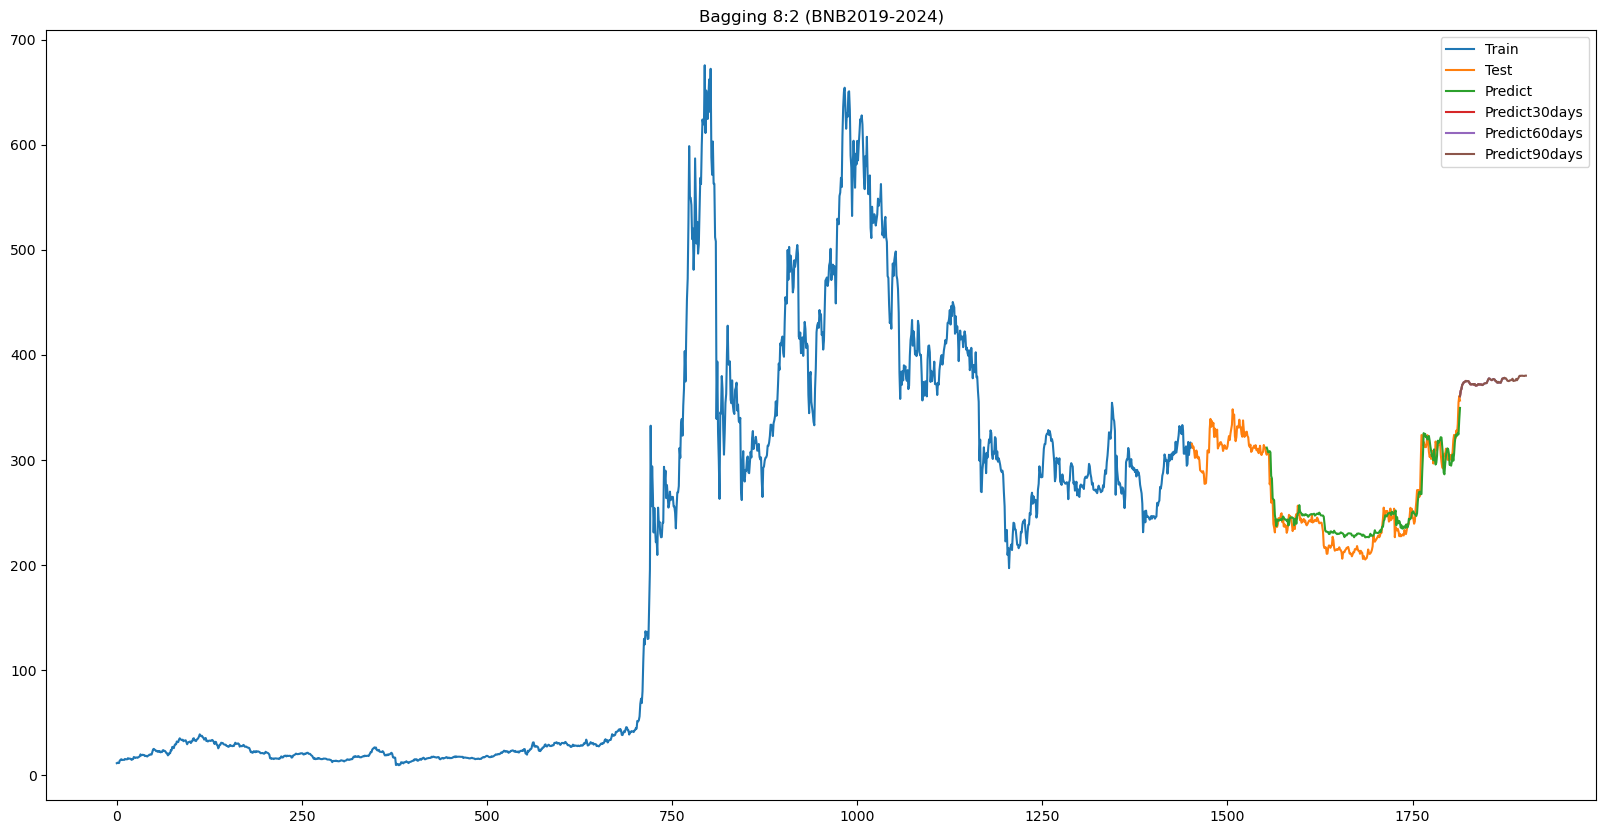

In [27]:
plt.figure(figsize=(20, 10))

plt.title('Bagging 8:2 (BNB2019-2024)')
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(bagged_y_pred.reshape(-1,1)))
prediect_data_index1 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index1,scaler.inverse_transform(bagg_lst_output1))
prediect_data_index2 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index2,scaler.inverse_transform(bagg_lst_output2))
prediect_data_index3 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index3,scaler.inverse_transform(bagg_lst_output3))
plt.legend(['Train','Test','Predict','Predict30days','Predict60days','Predict90days'])
plt.show()

In [28]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler



# Assume you have predictions in the scaled form
predictions_scaled = np.array(bagged_y_pred).reshape(-1, 1)
predictions_scaled1 = np.array(y_test).reshape(-1, 1)

# Inverse transform the scaled predictions
predictions_original = scaler.inverse_transform(predictions_scaled)
predictions_original1 = scaler.inverse_transform(predictions_scaled1)


In [29]:
#Đánh giá trên tập test
print("Chỉ số MSE trên tập test")
print("Bagging:", round(metrics.mean_squared_error(y_test, predictions_original), 4))
test_rmse = np.sqrt(np.mean((predictions_original - predictions_original1)**2))
print('Testing RMSE:', test_rmse)
# Tính MAPE
test_mape = np.mean(np.abs((predictions_original - predictions_original1) / y_test)) * 100
print('Testing MAPE:', test_mape)

Chỉ số MSE trên tập test
Bagging: 66390.528
Testing RMSE: 11.033513803336794
Testing MAPE: 2549.69078853281
